<img src="./img/p3/portada.png" />

|||||||||||||||||||||||||||||KNN||||||||||||||||||||||||||||||||||||
Porcentaje de bien clasificados KNN ('0diabetes.arff'): 78.125 %
Patron a clasificar del dataset(60)

Clase predicha KNN
b'tested_negative'
----------------
|||||||||||||||||||||||||||||SVM||||||||||||||||||||||||||||||||||||
Porcentaje de bien clasificados SVM ('0diabetes.arff'): 65.10416666666666 %
Patron a clasificar del dataset(60)

Clase predicha KNN
b'tested_negative'
----------------
|||||||||||||||||||||||||||||DTC||||||||||||||||||||||||||||||||||||
Porcentaje de bien clasificados DTC ('0diabetes.arff'): 72.91666666666666 %
Patron a clasificar del dataset(60)

Clase predicha KNN
b'tested_negative'
----------------
|||||||||||||||||||||||||||||KNN||||||||||||||||||||||||||||||||||||
Porcentaje de bien clasificados KNN ('1glass.arff'): 59.25925925925925 %
Patron a clasificar del dataset(127)

Clase predicha KNN
b'headlamps'
----------------
|||||||||||||||||||||||||||||SVM||||||||||||||||||||||||||||||||||||
Po

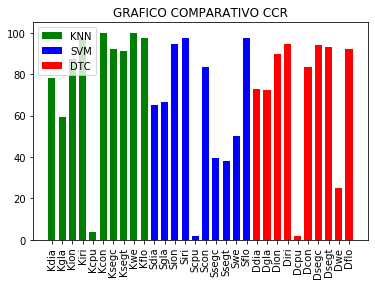





----------------------------GRAFICO COMPARATIVO ERROR----------------------------


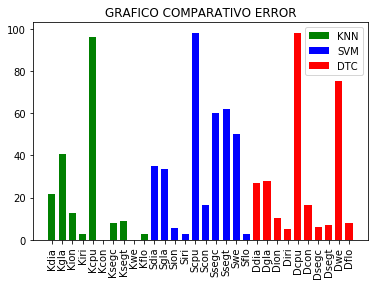





Test de Wilcoxon KNN vs SVM value: WilcoxonResult(statistic=5.0, pvalue=0.0687035743228782)
Test de Wilcoxon KNN vs DTC value: WilcoxonResult(statistic=16.0, pvalue=0.24112136827741826)
Test de Wilcoxon SVM vs DTC value: WilcoxonResult(statistic=12.0, pvalue=0.40081416938293446)




CCR de las instancias: ['0diabetes.arff', '1glass.arff', '2ionosphere.arff', '3ris.arff', '4cpu.arff', '5contactLenses.arff', '6segment-challenge.arff', '7segment-test.arff', '8weather.arff', '9iris.arff']
     0               1            2                 3          4          5                    6                        7                   8              9          10
0  ---  0diabetes.arff  1glass.arff  2ionosphere.arff  3ris.arff  4cpu.arff  5contactLenses.arff  6segment-challenge.arff  7segment-test.arff  8weather.arff  9iris.arff
1  KNN          78.125      59.2593              87.5    97.3684    3.77358                  100                       92              91.133            100     97.3684

In [3]:
import numpy as np
import sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from IPython.display import display
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import graphviz
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.metrics import mean_squared_error
import pydotplus
import ipywidgets as widgets
from scipy.io import arff
import pandas as pd
from os import listdir
import random
from scipy.stats import wilcoxon
import warnings
warnings.filterwarnings('ignore')

def wilcoxonTest(arrayX,arrayY,text):
    print('Test de Wilcoxon '+text+' value: '+str(wilcoxon(arrayX,arrayY)))

def predecir(aux,clasificador):
    array = clasificador.predict([aux])
    print('Clase predicha KNN')
    print(target[1][array][0])
    print('----------------')

def pintarGraficos(matrix,titulo):
    fig = plt.figure(u'Gráfica de barras')  # Figure
    ax = fig.add_subplot(111)  # Axes

    x1 = ['Kdia', 'Kgla', 'Kion', 'Kiri','Kcpu','Kcon', 'Ksegc','Ksegt','Kwe','Kflo']
    x2 = ['Sdia', 'Sgla', 'Sion', 'Siri','Scpu','Scon', 'Ssegc','Ssegt','Swe','Sflo']
    x3 = ['Ddia', 'Dgla', 'Dion', 'Diri','Dcpu','Dcon', 'Dsegc','Dsegt','Dwe','Dflo']
    y1 = []
    y2 = []
    y3 = []
    for columna in range(1, len(lista_datasets) + 1):
        y1.append(matrix[1][columna])
        y2.append(matrix[2][columna])
        y3.append(matrix[3][columna])

    plt.bar(x1, y1, color='g', width=0.7, align='center')
    plt.bar(x2, y2, color='b', width=0.7, align='center')
    plt.bar(x3, y3, color='r', width=0.7, align='center')
    plt.xticks(rotation='vertical')
    plt.legend(['KNN', 'SVM', 'DTC'])
    plt.title(titulo)
    plt.show()
    print('\n\n\n')

#MAIN
matrix_ccr   = [['---',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],['KNN',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],['SVM',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],['DTC',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]]
matrix_error = [['---',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],['KNN',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],['SVM',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],['DTC',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]]
lista_datasets = listdir('./data/p3/datasets/')
##Montar la matriz de CCR


c = 1
for i in lista_datasets:
    matrix_ccr[0][c] = i
    matrix_error[0][c] = i
    c = c + 1


lista_datasets = listdir('./data/p3/datasets/')
AUX = 1
for indice in lista_datasets:

    dataset = arff.loadarff('./data/p3/datasets/'+str(indice))
    df = pd.DataFrame(dataset[0])
    target = pd.factorize(df['class'])
    X_train,X_test,Y_train,Y_test=train_test_split(df.iloc[:, df.columns != 'class'],target[0], test_size=0.25)

    indice_aleatorio = random.randint(1, df.shape[0])
    patron_aleatorio = df.iloc[indice_aleatorio, df.columns != 'class']

    #Llamada y entrenamiento del algoritmo KNN
    print('|||||||||||||||||||||||||||||KNN||||||||||||||||||||||||||||||||||||')
    knn = KNeighborsClassifier()
    knn.fit(X_train,Y_train)
    print('Porcentaje de bien clasificados KNN (\''+str(indice)+'\'): '+str(knn.score(X_test,Y_test)*100)+' %')
    print('Patron a clasificar del dataset('+str(indice_aleatorio)+')\n')
    matrix_ccr[1][AUX] = round(knn.score(X_test,Y_test),10)*100
    matrix_error[1][AUX] = round(100 - matrix_ccr[1][AUX],10)
    predecir(patron_aleatorio,knn)

    #Llamada y entrenamiento algoritmo SVM
    print('|||||||||||||||||||||||||||||SVM||||||||||||||||||||||||||||||||||||')
    svm = SVC()
    svm.fit(X_train, Y_train)
    print('Porcentaje de bien clasificados SVM (\''+str(indice)+'\'): '+str(svm.score(X_test,Y_test)*100)+' %')
    print('Patron a clasificar del dataset(' + str(indice_aleatorio) + ')\n')
    matrix_ccr[2][AUX] = round(svm.score(X_test,Y_test),10)*100
    matrix_error[2][AUX] = round(100 - matrix_ccr[2][AUX],10)
    predecir(patron_aleatorio,svm)

    # Llamada y entrenamiento algoritmo DTC
    print('|||||||||||||||||||||||||||||DTC||||||||||||||||||||||||||||||||||||')
    dtc=DecisionTreeClassifier()
    dtc.fit(X_train, Y_train)
    print('Porcentaje de bien clasificados DTC (\'' + str(indice) + '\'): ' + str(dtc.score(X_test, Y_test) * 100) + ' %')
    print('Patron a clasificar del dataset(' + str(indice_aleatorio) + ')\n')
    matrix_ccr[3][AUX] = round(dtc.score(X_test,Y_test),10)*100
    matrix_error[3][AUX] = round(100 - matrix_ccr[3][AUX],10)
    predecir(patron_aleatorio, dtc)
    AUX = AUX + 1





print('----------------------------GRAFICO COMPARATIVO CCR----------------------------')
pintarGraficos(matrix_ccr,'GRAFICO COMPARATIVO CCR')

print('----------------------------GRAFICO COMPARATIVO ERROR----------------------------')
pintarGraficos(matrix_error,'GRAFICO COMPARATIVO ERROR')

matrix_ccr = pd.DataFrame(matrix_ccr)
matrix_error = pd.DataFrame(matrix_error)

wilcoxonTest(matrix_ccr.loc[1,1:], matrix_ccr.loc[2,1:],'KNN vs SVM')
wilcoxonTest(matrix_ccr.loc[1,1:], matrix_ccr.loc[3,1:],'KNN vs DTC')
wilcoxonTest(matrix_ccr.loc[2,1:], matrix_ccr.loc[3,1:],'SVM vs DTC')
# create output widgets

print('\n\n\n')
print('CCR de las instancias: '+str(lista_datasets))
print(matrix_ccr.to_string())
print('\n\n\n')
print('Error de las instancias: '+str(lista_datasets))
print(matrix_error.to_string())

